## Validación local del modelo de predicción de taxis

In [1]:
import joblib
import sagemaker 
from sagemaker.sklearn import SKLearnModel
from sagemaker.serializers import CSVSerializer

In [2]:
model = joblib.load("model.joblib")

DIADESEMANA	= 5

HORA = 7

MES = 4

In [3]:
model.predict([[5, 7, 4],[5, 8, 4]])

array([0, 0])

## Validación remota del modelo de predicción de taxis

In [4]:
s3_uri_model = 'https://proyecto-taxis-usa.s3.amazonaws.com/model/model.tar.gz'

In [5]:
model = SKLearnModel(entry_point='entry_point.py', role='LabRole', framework_version='1.0-1', model_data=s3_uri_model)

In [6]:
predictor = model.deploy(initial_instance_count=1, instance_type="ml.m4.xlarge")

---------!

In [7]:
predictor.serializer = CSVSerializer()

In [11]:
predictor.predict([[5,7,4],[1,6,3],[1,6,3]])

array([0, 0, 0])

## Se valida contra el endpoint

In [12]:
payload = '1, 2, 1\n 2, 3, 5\n'

import boto3

endpoint = 'sagemaker-scikit-learn-2022-12-06-01-34-50-163'

client = boto3.client('sagemaker-runtime','us-east-1')

response = client.invoke_endpoint(
    EndpointName=endpoint,
    Body=payload,
    ContentType='text/csv'
)

prediction = response['Body'].read()
print(prediction)

b'[0, 0]'


![Captura de pantalla 2022-12-05 215638.png](attachment:Captura de pantalla 2022-12-05 215638.png)
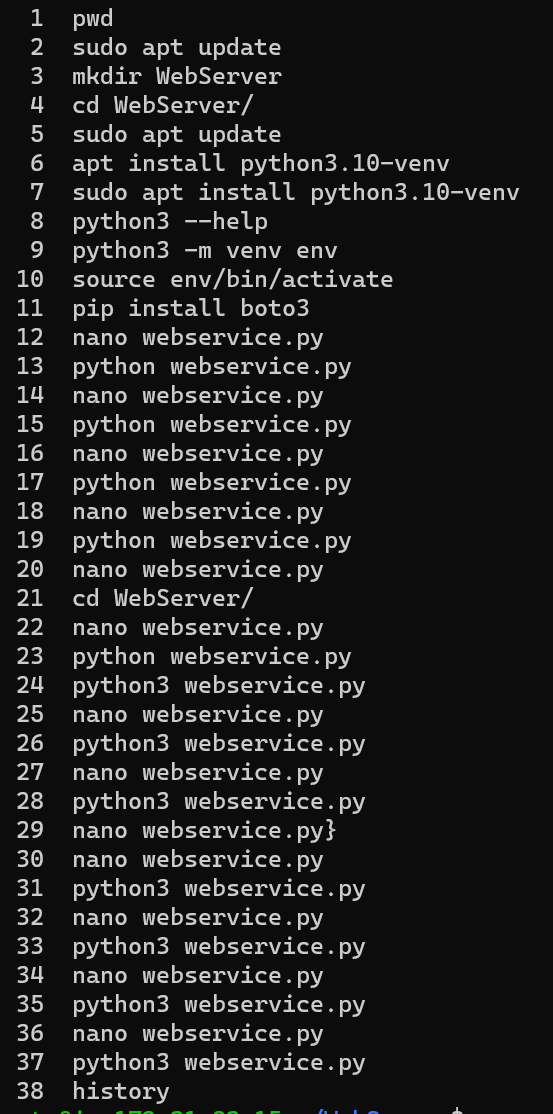